https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

# Ejercicio Regression Tree
Son datos de temperaturas tomados de la ciudad de Seattle. El objetivo es intentar predecir lo mejor posible la máxima temperatura (columna `actual`) que alcanzaremos al día siguiente. Para ello contaremos con temperaturas de los dos días anteriores, históricos de máximas temperaturas y un amigo bastante chapas que te da su predicción del tiempo cada día.

**Resumen de datos**:
* year: 2016 for all data points
* month: number for month of the year
* day: number for day of the year
* week: day of the week as a character string
* temp_2: max temperature 2 days prior
* temp_1: max temperature 1 day prior
* average: historical average max temperature
* actual: max temperature measurement
* friend: your friend’s prediction, a random number between 20 below the average and 20 above the average


### 1. Importa el csv "temps.csv"

In [2]:
import pandas as pd
temps_df = pd.read_csv('temps.csv')
temps_df

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41
...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,Tues,42,42,45.2,47,41,50,47,47
344,2016,12,28,Wed,42,47,45.3,48,41,49,44,58
345,2016,12,29,Thurs,47,48,45.3,48,43,50,45,65
346,2016,12,30,Fri,48,48,45.4,57,44,46,44,42


### 2. Lidia con las variables categóricas del dataset

In [3]:
temps_df = pd.get_dummies(temps_df)
temps_df

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,45,43,50,44,29,1,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,44,41,50,44,61,0,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,41,43,46,47,56,0,0,0,1,0,0,0
3,2016,1,4,44,41,45.9,40,44,48,46,53,0,1,0,0,0,0,0
4,2016,1,5,41,40,46.0,44,46,46,46,41,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,42,42,45.2,47,41,50,47,47,0,0,0,0,0,1,0
344,2016,12,28,42,47,45.3,48,41,49,44,58,0,0,0,0,0,0,1
345,2016,12,29,47,48,45.3,48,43,50,45,65,0,0,0,0,1,0,0
346,2016,12,30,48,48,45.4,57,44,46,44,42,1,0,0,0,0,0,0


In [7]:
import seaborn as sns
temp_6col = temps_df.iloc[1:7]
sns.pairplot(temp_6col)

TypeError: 'data' must be pandas DataFrame object, not: <class 'pandas.core.series.Series'>

### 3. Divide en train y test

In [8]:
X = temps_df.drop(columns=['actual'])
y = temps_df['actual']



In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
y,
test_size=0.25,
random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(261, 17)
(87, 17)
(261,)
(87,)


### 4. Entrena el modelo
Utiliza un DecisionTreeRegressor

In [14]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor()

### 5. Calcula su MAE
Sin usar sklearn

In [19]:
import numpy as np
#1. MAE de train
predictions = tree_reg.predict(X_train)
errors = np.abs(predictions - y_train)

print ("Mean absolute errors on train: ", round(np.mean(errors), 2) )

Mean absolute errors on train:  0.0


In [23]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_train, predictions)


0.0

In [30]:
import numpy as np
#1. MAE de train
predictions = tree_reg.predict(X_test)
errors = np.abs(predictions - y_test)

print ("Mean absolute errors on test: ", round(np.mean(errors), 2) )

Mean absolute errors on test:  6.0


In [28]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, predictions)

6.0

### 6. Calcula su MAPE
Sin usar sklearn

In [29]:
#MAPE test

mape = 100 * (errors / y_test)
print("MAPE ", round(np.mean(mape), 2), "%")

MAPE  9.36 %


In [31]:
from sklearn.metrics import mean_absolute_percentage_error

mean_absolute_percentage_error(y_test, predictions) * 100

9.361328300523681

### 7. Representa el árbol de decision

[Text(0.4564618398702903, 0.96875, 'temp_1 <= 59.5\nsquared_error = 138.482\nsamples = 261\nvalue = 62.387'),
 Text(0.20232396541074738, 0.90625, 'average <= 46.85\nsquared_error = 45.879\nsamples = 107\nvalue = 51.374'),
 Text(0.09218653489808523, 0.84375, 'temp_1 <= 46.5\nsquared_error = 20.345\nsamples = 29\nvalue = 43.0'),
 Text(0.04107473749227918, 0.78125, 'month <= 6.5\nsquared_error = 11.504\nsamples = 22\nvalue = 41.636'),
 Text(0.019765287214329835, 0.71875, 'day <= 8.5\nsquared_error = 6.64\nsamples = 5\nvalue = 44.6'),
 Text(0.014823965410747375, 0.65625, 'forecast_under <= 46.5\nsquared_error = 2.25\nsamples = 4\nvalue = 43.5'),
 Text(0.009882643607164917, 0.59375, 'average <= 45.65\nsquared_error = 0.222\nsamples = 3\nvalue = 44.333'),
 Text(0.004941321803582459, 0.53125, 'squared_error = 0.0\nsamples = 1\nvalue = 45.0'),
 Text(0.014823965410747375, 0.53125, 'squared_error = 0.0\nsamples = 2\nvalue = 44.0'),
 Text(0.019765287214329835, 0.59375, 'squared_error = 0.0\nsampl

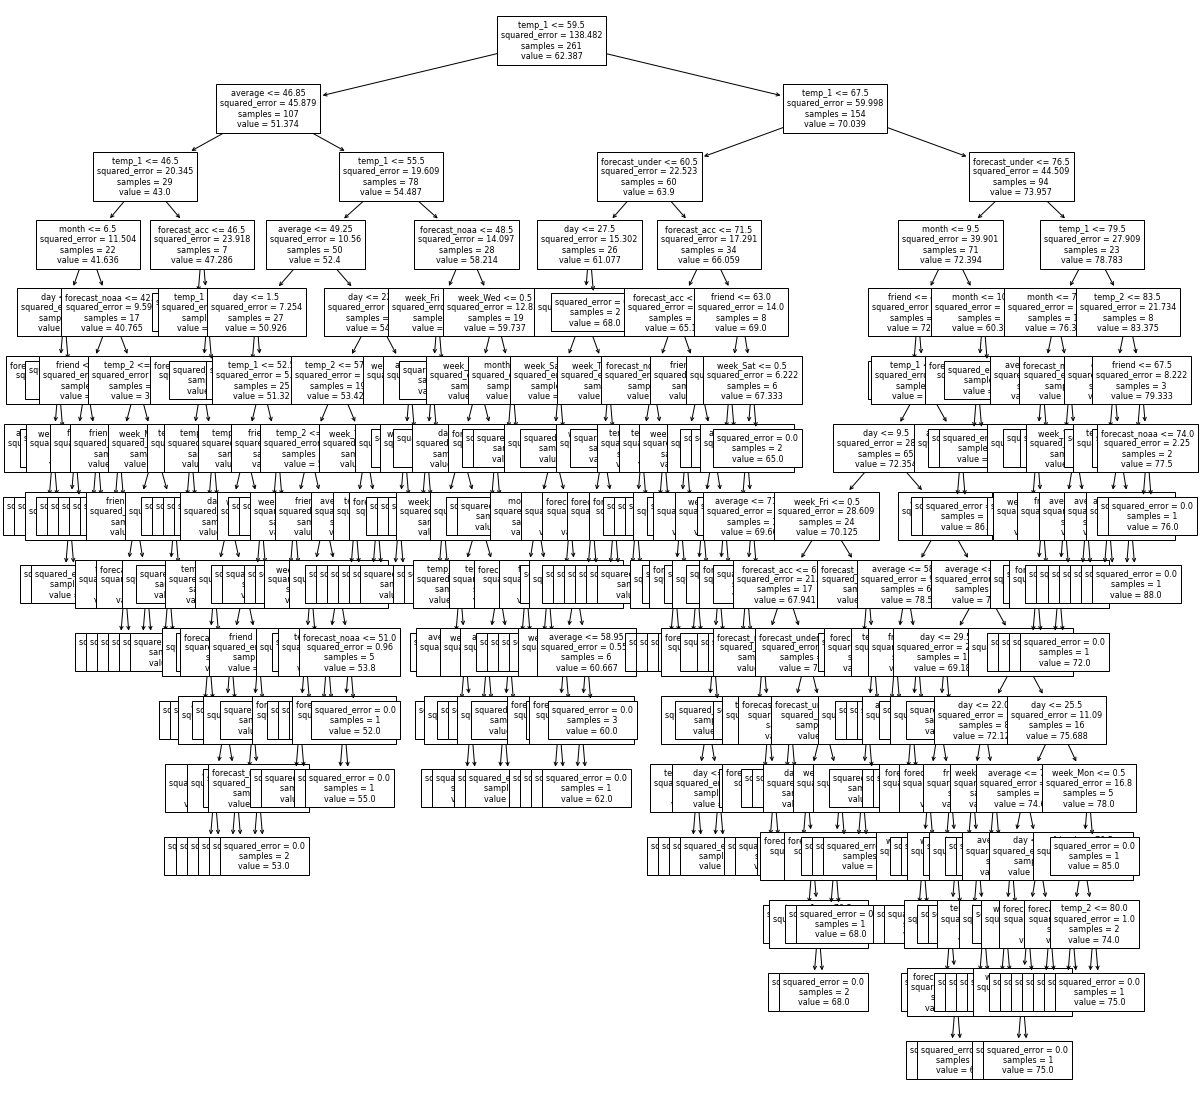

In [35]:
import matplotlib.pyplot as plt
import sklearn

plt.figure(figsize= (20,20))
sklearn.tree.plot_tree(tree_reg,
feature_names=X.columns,
class_names="actual", fontsize=8);

### 8. Modifica el max_depth a 3 y vuelve a entrenarlo

### 9. Vuelve a calcular si MAE

### 10. Vuelve a representar su árbol

### 10. Obten el `feature_importances` de cada variable en el último modelo